<a href="https://colab.research.google.com/github/william-screen/data-visualization-590/blob/master/labs/Data_Visualization_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Google Play Store Apps

* Members : Bill Screen | Manjunath Sivan | Tarun Rawat
* Dataset: https://www.kaggle.com/lava18/google-play-store-apps

Mobile apps on the Google Play Store platform have become a multi-billion dollar industry and continue to show strong growth. By performing exploratory data mining and data cleaning on a large Kaggle data set, we seek to gain insights into what categories of mobile apps are contributing to the strong revenue growth. 

The information gained will be used to provide businesses and researchers with quantifiable metrics and visualizations to make strategic decisions. Specific goals are to (1) visualize the categorical data; (2) analyze pricing trends; (3) summarize patterns and themes. 



## How to Navigate this Notebook

Below is a summary of the main tasks performed in each section of the notebook. Please use the ToC for a more detailed classification of tasks under each section.

* __Section 1__
* > In section 1 we introduce the project and start preparing our notebook with required imports, data loading, and some EDA

* __Section 2__
* > Perform Adavance Data analysis based on Proce trends
* > Analyze pricing trends

* __Section 3__
* > Summarize patterns and themes

* __Section 4__
* > Provide sales forecasting and prediction models for mobile app start-up companies doing market research.
* > Provide marketing and advertisers with reproducible quantitative metrics on popular trending apps for targeted marketing.
* > Provide end-users with comparative metrics by category when selecting a mobile app to download.



## Preparing the Notebook

In [0]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

# plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Data Loading

In [0]:
# Loading Play store data
gps_data = pd.read_csv('googleplaystore.csv')

# Loading Play store user reviews data
gps_ur_data = pd.read_csv('googleplaystore_user_reviews.csv')

In [0]:
gps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
gps_ur_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Data Cleansing

### GPS Data Cleansing
##### 1. Convert Rating to Numeric
##### 2. Convert Reviews to Numeric
##### 3. Convert App Size to MB
##### 4. Convert Installs to Numeric
##### 5. Convert Price to Numeric


In [0]:
# Convert Rating to Numeric
gps_data.Rating = pd.to_numeric(gps_data.Rating, errors='coerce')


# Convert Reviews to Numeric
def convert_review_count_to_numeric(value):
    converted_value = value    
    
    # check if data is numeric and in MB
    if(value[-1] == 'M' and value[:-1].isnumeric) :
        converted_value = str(float(value[:-1])*1000000)
        
    # check if data is numeric and in KB
    if(value[-1] == 'k' and value[:-1].isnumeric) :
        # data is numeric and but in Kb
        converted_value = str(float(value[:-1])*1000)
    
    return converted_value
    
gps_data['Reviews'] = gps_data['Reviews'].apply(lambda x: convert_review_count_to_numeric(x))
gps_data.Reviews = pd.to_numeric(gps_data.Reviews, errors='coerce')


# Convert App Size to MB
def convert_app_size_to_MB(value):
    converted_value = ''    
    
    # check if data is numeric and already in MB
    if(value[-1] == 'M' and value[:-1].isnumeric) :
        converted_value = str(value[:-1])
        
    # check if data is numeric and already in KB
    # if yes, convert to MB
    if(value[-1] == 'k' and value[:-1].isnumeric) :
        # data is numeric and but in Kb
        converted_value = str(float(value[:-1])/1000)
    
    return converted_value

gps_data['Size'] = gps_data['Size'].apply(lambda x: convert_app_size_to_MB(x))
gps_data.Size = pd.to_numeric(gps_data.Size, errors='coerce')


# Convert Installs to Numeric
gps_data.Installs = gps_data.Installs.str.replace('+','', regex=True).replace(',','', regex=True)
gps_data.Installs = pd.to_numeric(gps_data.Installs, errors='coerce')


# Convert Price to Numeric
def convert_price_to_numeric(value):
    converted_value = '0'    
    
    # check if data is in $
    if(value[0] == '$' and value[1:].isnumeric) :
        converted_value = str(value[1:])
    
    return converted_value
    
gps_data['Price'] = gps_data['Price'].apply(lambda x: convert_price_to_numeric(x))
gps_data.Price = pd.to_numeric(gps_data.Price, errors='coerce')

gps_data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### GPS User Review Data Cleansing

In [0]:
gps_ur_data.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

### Merge GPS Data and User Review Data after Cleansing

In [0]:
gps_merged = pd.merge(gps_data, gps_ur_data, how='inner', on=['App'])
gps_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


### Generate Separate Data set for Free and Paid Apps

In [0]:
gps_data_free = gps_data[gps_data.Type=='Free']
gps_data_paid = gps_data[gps_data.Type=='Paid']

gps_merged_free = gps_merged[gps_merged.Type=='Free']
gps_merged_paid = gps_merged[gps_merged.Type=='Paid']

gps_data_free.head()
gps_data_paid.head()

print(gps_data_free['Rating'].mean())

4.1675622726000565


## Exploratory Data Analysis

### Data Distribution

In [0]:
print(gps_data.shape)

(10841, 13)


In [0]:
print(gps_ur_data.shape)

(64295, 5)


In [0]:
print(gps_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              9145 non-null float64
Installs          10840 non-null float64
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(5), object(8)
memory usage: 1.1+ MB
None


In [0]:
print(gps_ur_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


In [0]:
gps_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1696
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [0]:
gps_ur_data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [0]:
#missing data
total = gps_data.isnull().sum().sort_values(ascending=False)
percent = (gps_data.isnull().sum()/gps_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Size,1696,0.156443
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092


In [0]:
gps_data.dropna(how ='any', inplace = True)

In [0]:
#missing data
total = gps_data.isnull().sum().sort_values(ascending=False)
percent = (gps_data.isnull().sum()/gps_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [0]:
print(gps_data.shape)

(7723, 13)


In [0]:
gps_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079819,0.083640,0.052693,-0.021320
Reviews,0.079819,1.000000,0.240382,0.626187,-0.010184
Size,0.083640,0.240382,1.000000,0.162707,-0.026272
Installs,0.052693,0.626187,0.162707,1.000000,-0.010852
Price,-0.021320,-0.010184,-0.026272,-0.010852,1.000000


4.1739349993525865
4.1675622726000565
4.252859618717502


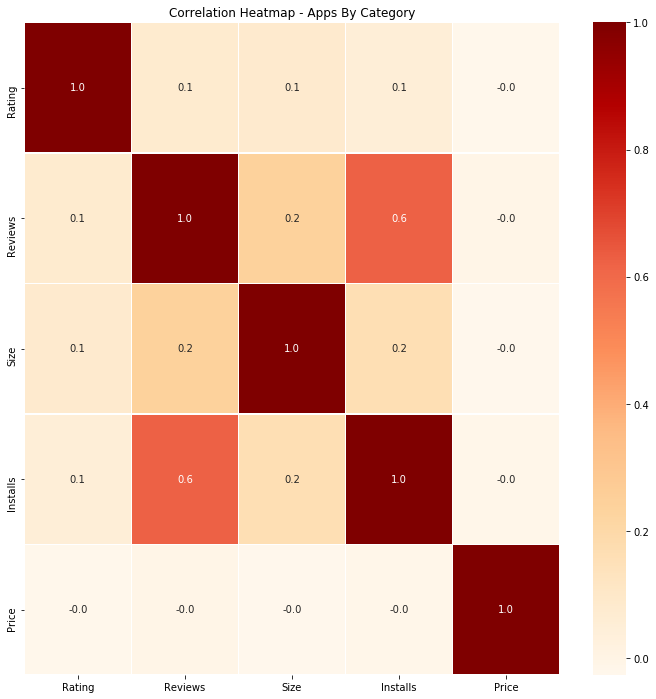

In [0]:
print(gps_data['Rating'].mean())
print(gps_data.loc[gps_data.Type=='Free']['Rating'].mean())
print(gps_data.loc[gps_data.Type=='Paid']['Rating'].mean())


#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(gps_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="OrRd")

# Set chart title
plt.title('Correlation Heatmap - Apps By Category')
# Save plot image to file
plt.savefig('Heatmap_Apps_By_Category.png')
# Show plot
plt.show()

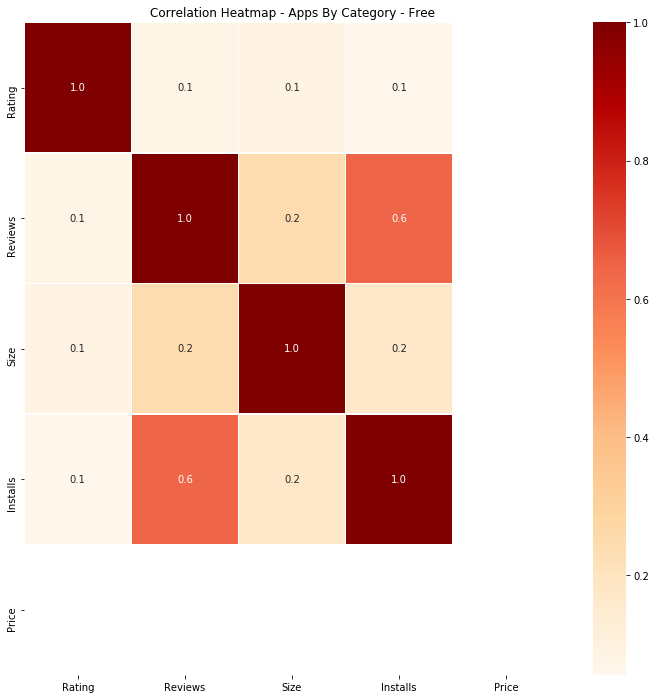

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(gps_data_free.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="OrRd")

# Set chart title
plt.title('Correlation Heatmap - Apps By Category - Free')
# Save plot image to file
plt.savefig('Heatmap_Free_Apps_By_Category.png')
# Show plot
plt.show()

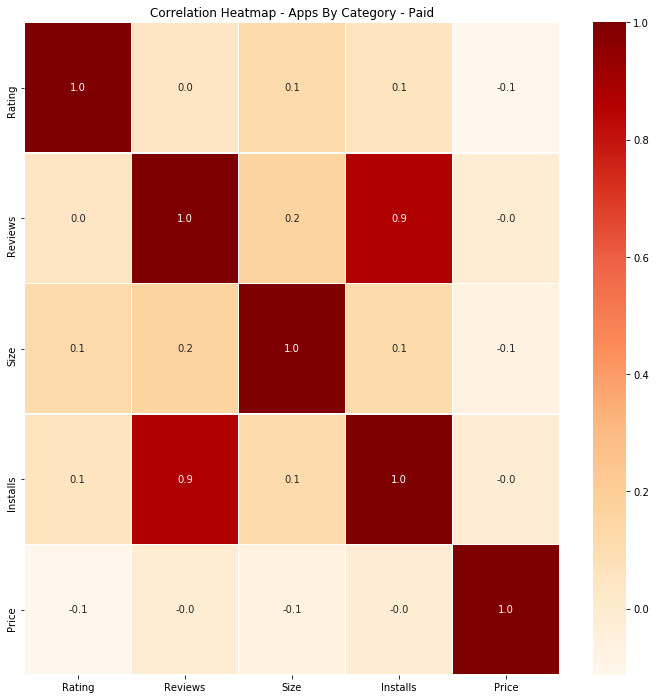

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(gps_data_paid.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="OrRd")

# Set chart title
plt.title('Correlation Heatmap - Apps By Category - Paid')
# Save plot image to file
plt.savefig('Heatmap_Paid_Apps_By_Category.png')
# Show plot
plt.show()

###WordClouds

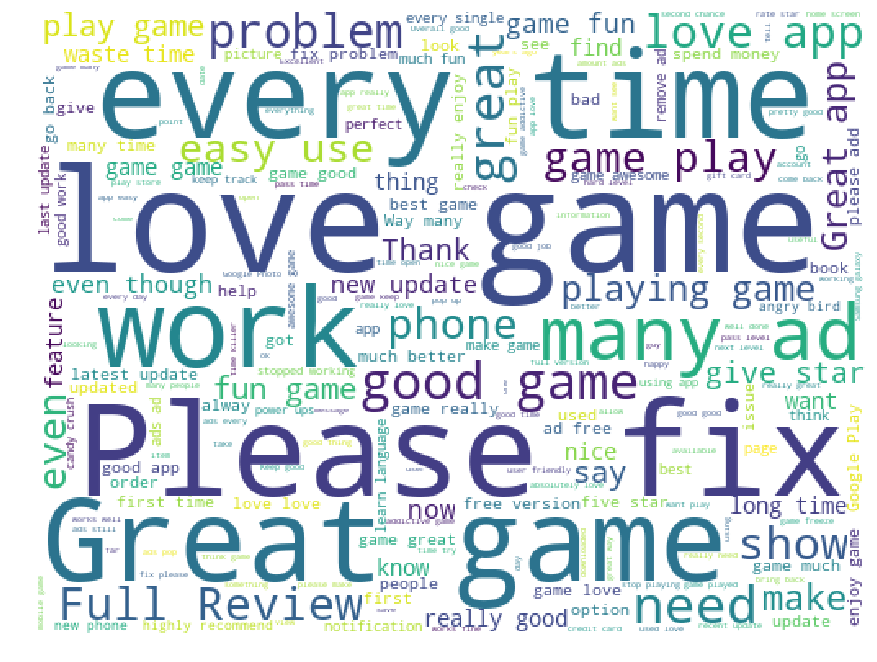

In [0]:
# word cloud library
from wordcloud import WordCloud        

wc_merged = gps_merged.loc[:]['Translated_Review'].apply(lambda x: '' if str(x) == 'nan' else x)

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(str(v) for v in wc_merged))




plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wc_free_and_paid_word_cloud.png')

plt.show()

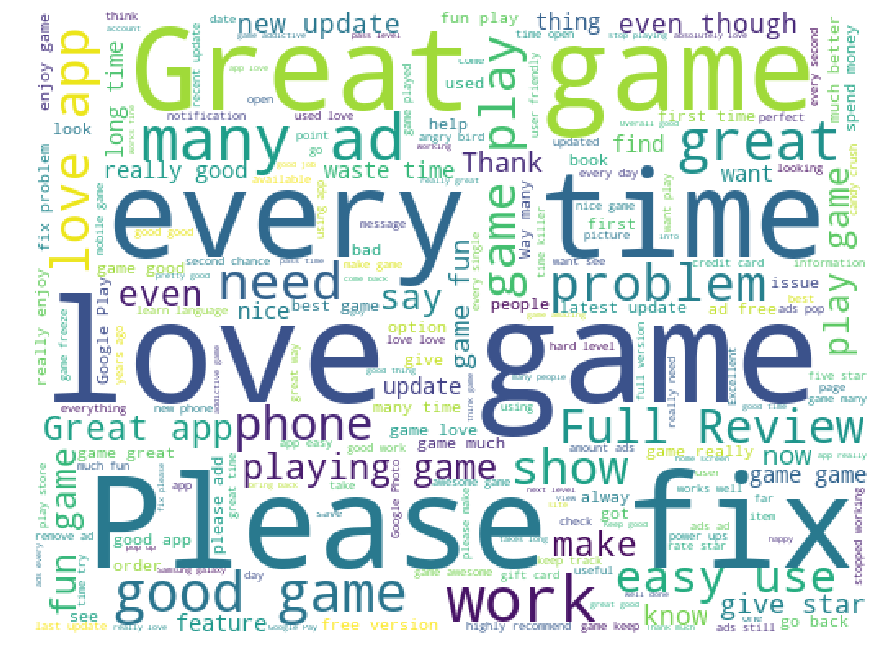

In [0]:
# word cloud library
from wordcloud import WordCloud        

wc_free = gps_merged.loc[gps_merged.Type=='Free']['Translated_Review'].apply(lambda x: '' if str(x) == 'nan' else x)

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(str(v) for v in wc_free))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wc_free_word_cloud.png')

plt.show()

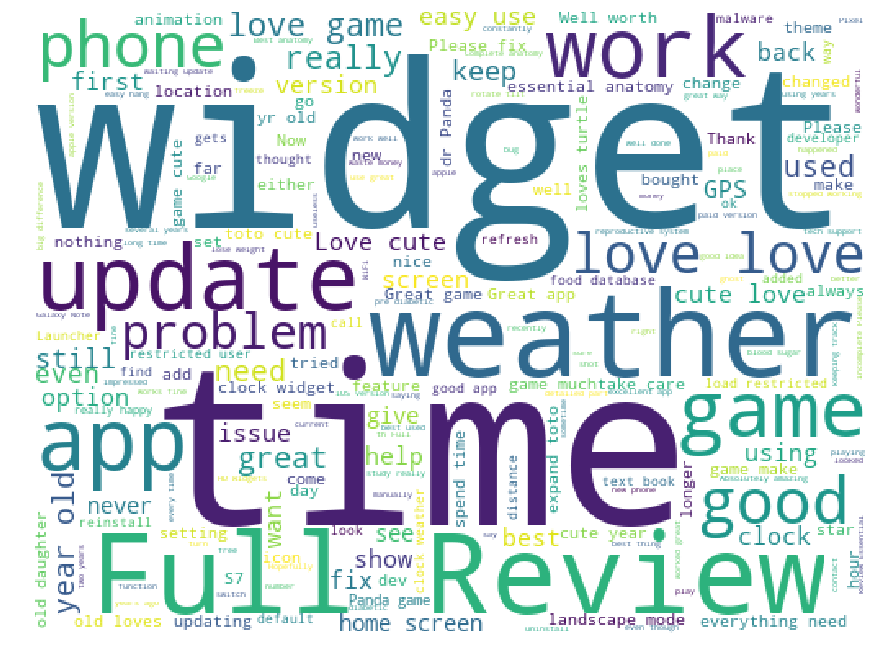

In [0]:
# word cloud library
from wordcloud import WordCloud        

wc_paid = gps_merged.loc[gps_merged.Type=='Paid']['Translated_Review'].apply(lambda x: '' if str(x) == 'nan' else x)

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(str(v) for v in wc_paid))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wc_paid_word_cloud.png')

plt.show()

###Free and Paid Bar Chart

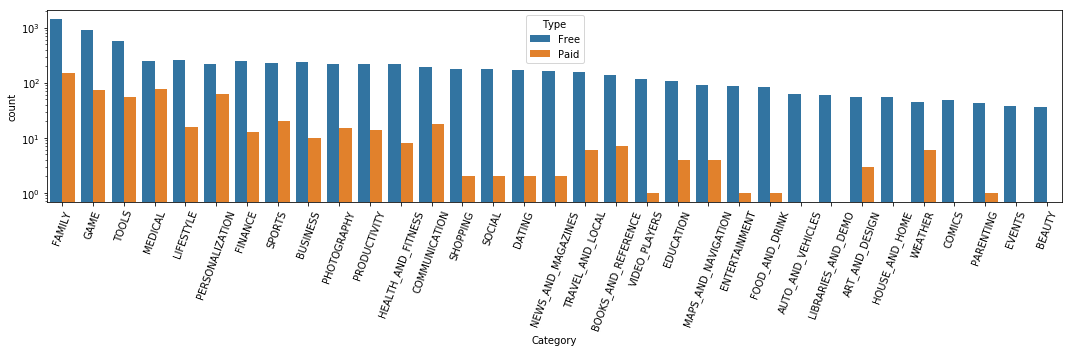

In [0]:
# Free vs paid Category wise
f, ax = plt.subplots(figsize=(15, 5))


descending_order = gps_data['Category'].value_counts().sort_values(ascending=False).index

g = sns.countplot(x='Category',hue='Type',data=gps_data, ax=ax, order=descending_order)
g.set_yscale('log')
plt.xticks(rotation=70)

# Use tight layout to save x-axis labels
plt.tight_layout()

# Save plot image to file
plt.savefig('Countplot_Category_Free_vs_Paid.png')
plt.show()

###Apps By Category - Pie Chart

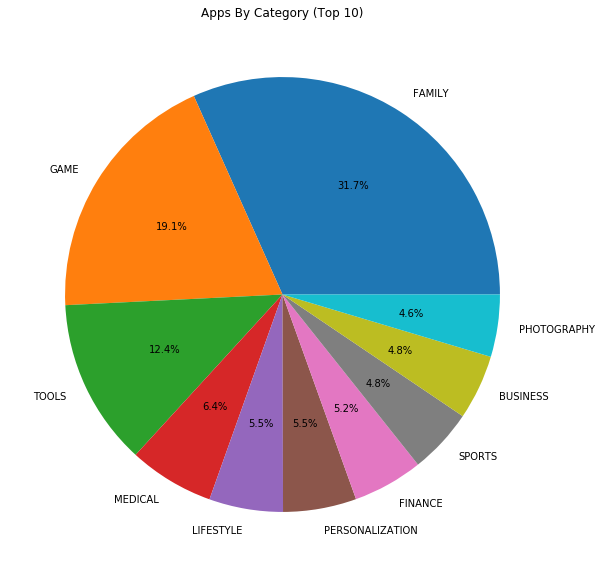

In [0]:
# APPS BY CATEGORY - PIE CHART - TOP 10

# Set chart data source
number_of_apps_in_category = gps_data['Category'].value_counts().sort_values(ascending=False).head(10)

# Set chart figure size
plt.figure(figsize=(10,10))

# Set chart lables and values
labels = number_of_apps_in_category.index
values = number_of_apps_in_category.values
# Set pie chart parameters
plt.pie(values, labels=labels, autopct='%1.1f%%')
# Set chart title
plt.title('Apps By Category (Top 10)')
# Save plot image to file
plt.savefig('Pie_Apps_By_Category.png')

# Show Plot
plt.show()

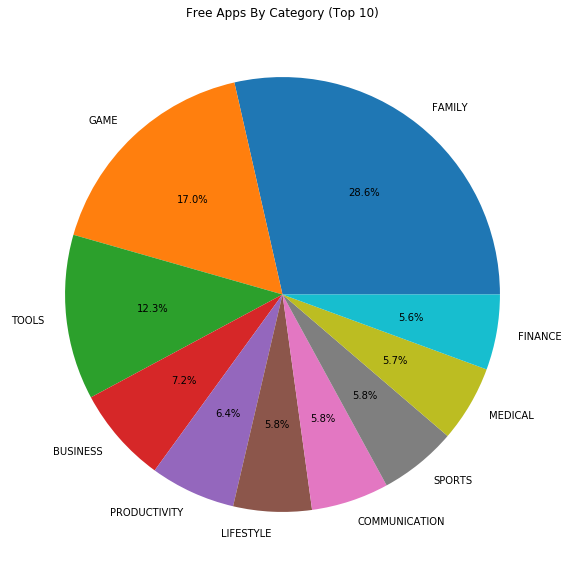

In [0]:
# FREE APPS BY CATEGORY - PIE CHART - TOP 10

# Set chart data source
number_of_apps_in_category = gps_data_free['Category'].value_counts().sort_values(ascending=False).head(10)

# Set chart figure size
plt.figure(figsize=(10,10))

# Set chart lables and values
labels = number_of_apps_in_category.index
values = number_of_apps_in_category.values
# Set pie chart parameters
plt.pie(values, labels=labels, autopct='%1.1f%%')
# Set chart title
plt.title('Free Apps By Category (Top 10)')
# Save plot image to file
plt.savefig('Pie_Free_Apps_By_Category.png')

# Show Plot
plt.show()

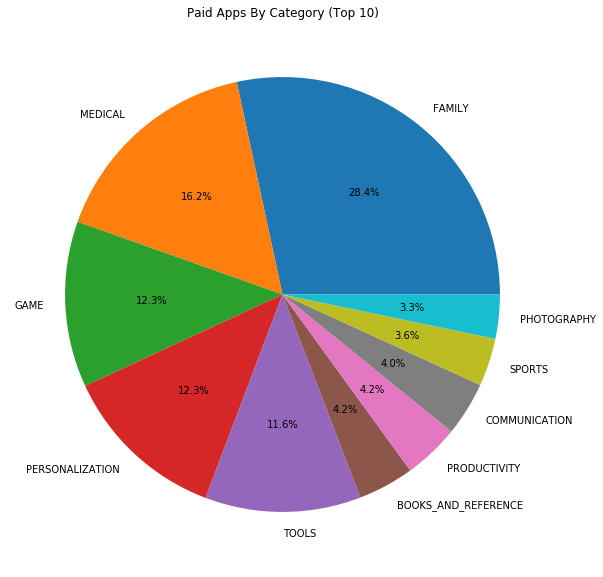

In [0]:
# PAID APPS BY CATEGORY - PIE CHART - TOP 10

# Set chart data source
number_of_apps_in_category = gps_data_paid['Category'].value_counts().sort_values(ascending=False).head(10)

# Set chart figure size
plt.figure(figsize=(10,10))

# Set chart lables and values
labels = number_of_apps_in_category.index
values = number_of_apps_in_category.values
# Set pie chart parameters
plt.pie(values, labels=labels, autopct='%1.1f%%')
# Set chart title
plt.title('Paid Apps By Category (Top 10)')
# Save plot image to file
plt.savefig('Pie_Paid_Apps_By_Category.png')

# Show Plot
plt.show()

###Box Plots

<Figure size 720x720 with 0 Axes>

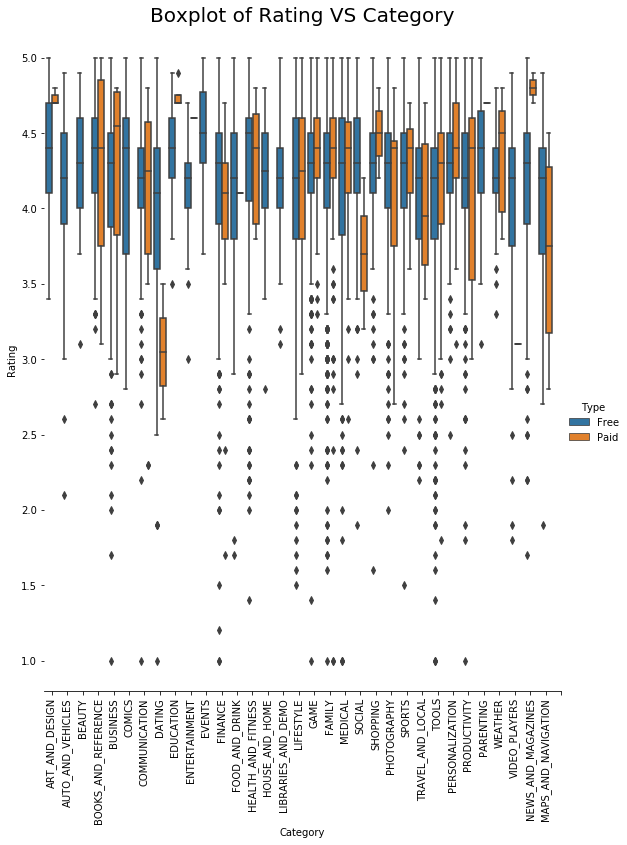

In [0]:
# Set chart figure size
plt.figure(figsize=(10,10))

#g = sns.catplot(x="Category",y="Rating",data=gps_data, kind="box", height = 10 ,palette = "Set1")

g = sns.catplot(x="Category", y="Rating", hue="Type", kind="box", data=gps_data, height=10, aspect=.8);

g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)
plt.show()

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

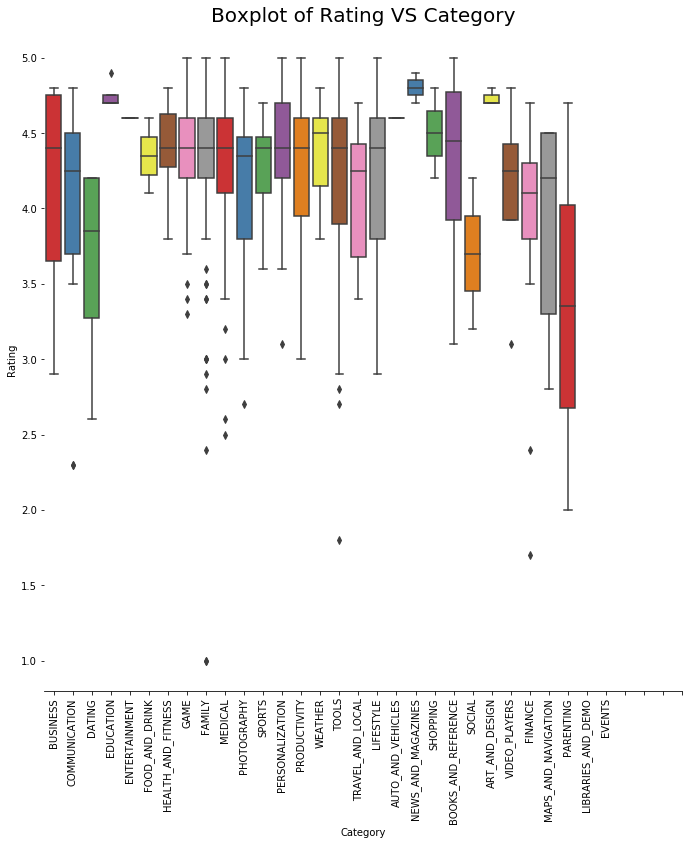

In [0]:
g = sns.catplot(x="Category",y="Rating",data=gps_data_paid, kind="box", height = 10 ,palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

In [0]:
gps_data.loc[ gps_data['Price'] == 0, 'PriceBand'] = '0 Free'
gps_data.loc[(gps_data['Price'] > 0) & (gps_data['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
gps_data.loc[(gps_data['Price'] > 0.99) & (gps_data['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
gps_data.loc[(gps_data['Price'] > 2.99) & (gps_data['Price'] <= 4.99), 'PriceBand']   = '3 normal'
gps_data.loc[(gps_data['Price'] > 4.99) & (gps_data['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
gps_data.loc[(gps_data['Price'] > 14.99) & (gps_data['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
gps_data.loc[(gps_data['Price'] > 29.99), 'PriceBand']  = '6 FXXXing expensive'

Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

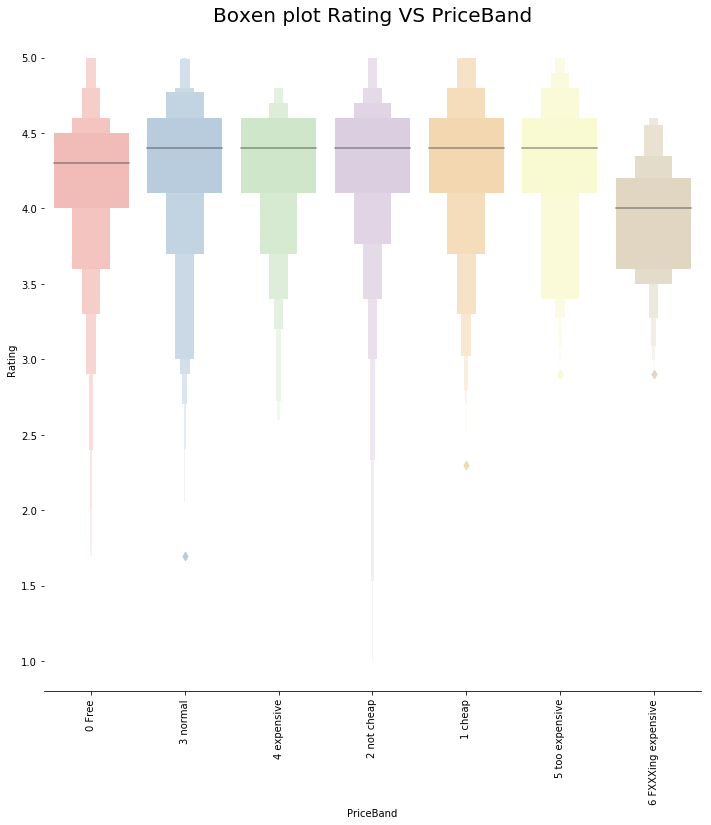

In [0]:
g = sns.catplot(x="PriceBand",y="Rating",data=gps_data, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

###Apps Install By Category - Bar Chart

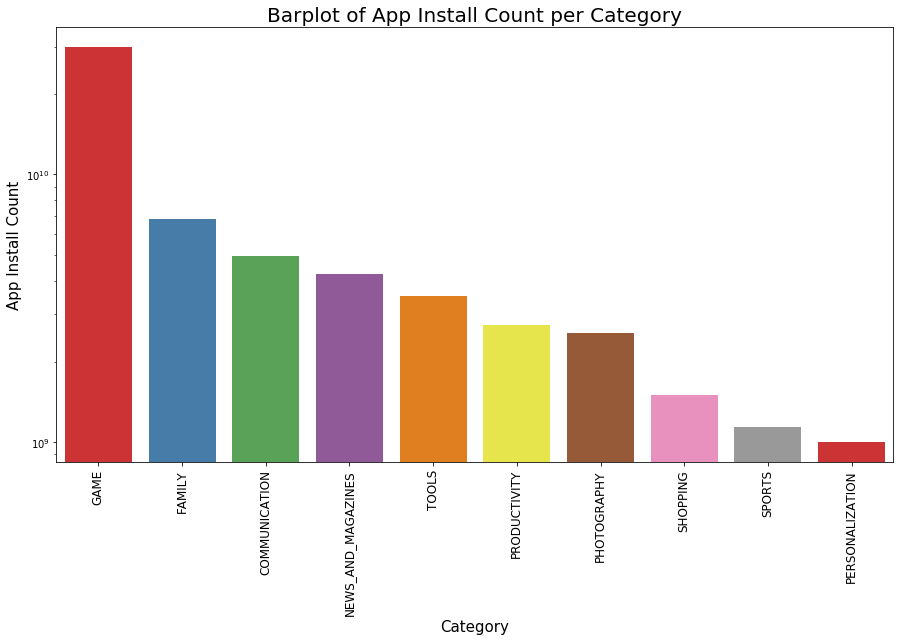

In [0]:
# App Installs by Category
category_installs_sum = gps_data.groupby(["Category"]).sum()['Installs']
pd_df = pd.DataFrame(dict(features=category_installs_sum.index, count=category_installs_sum.values))
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

pd_df.head()

plt.figure(figsize=(15,8))
ax = sns.barplot(data=pd_df, x='features', y='count', palette='Set1')
ax.set_xlabel("Category",fontsize=15)
ax.set_ylabel("App Install Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)

'''
for i, v in enumerate(pd_df["count"].iteritems()):        
    #ax.text(i ,v[1], "{:,}".format(np.log(v[1])), color='m', va ='bottom', rotation=45)
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")
'''

plt.title('Barplot of App Install Count per Category', size = 20)
ax.set_yscale('log')
plt.savefig('App_Install_vs_Category.png')
plt.show()

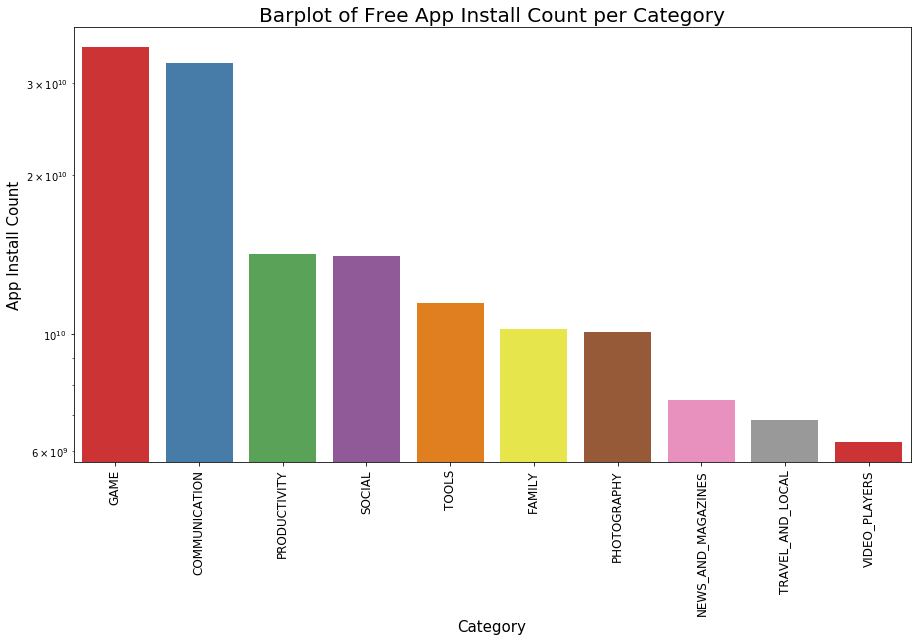

In [0]:
# App Installs by Category
category_installs_sum = gps_data_free.groupby(["Category"]).sum()['Installs']
pd_df = pd.DataFrame(dict(features=category_installs_sum.index, count=category_installs_sum.values))
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

pd_df.head()

plt.figure(figsize=(15,8))
ax = sns.barplot(data=pd_df, x='features', y='count', palette='Set1')
ax.set_xlabel("Category",fontsize=15)
ax.set_ylabel("App Install Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)

'''
for i, v in enumerate(pd_df["count"].iteritems()):        
    #ax.text(i ,v[1], "{:,}".format(np.log(v[1])), color='m', va ='bottom', rotation=45)
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")
'''

plt.title('Barplot of Free App Install Count per Category', size = 20)
ax.set_yscale('log')
plt.savefig('Free_App_Install_vs_Category.png')
plt.show()

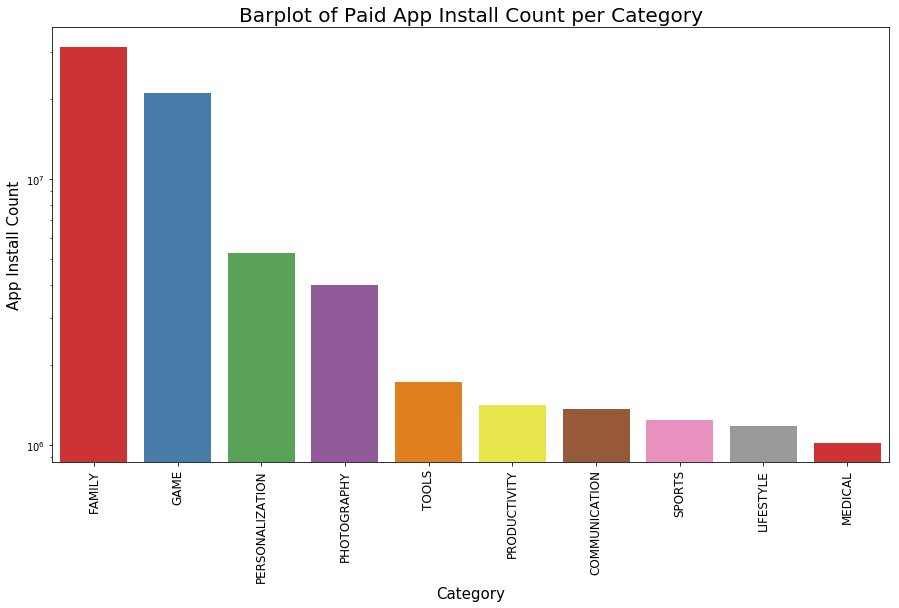

In [0]:
# App Installs by Category
category_installs_sum = gps_data_paid.groupby(["Category"]).sum()['Installs']
pd_df = pd.DataFrame(dict(features=category_installs_sum.index, count=category_installs_sum.values))
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

plt.figure(figsize=(15,8))
ax = sns.barplot(data=pd_df, x='features', y='count', palette='Set1')
ax.set_xlabel("Category",fontsize=15)
ax.set_ylabel("App Install Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)

'''
for i, v in enumerate(pd_df["count"].iteritems()):        
    #ax.text(i ,v[1], "{:,}".format(np.log(v[1])), color='m', va ='bottom', rotation=45)
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")
'''

plt.title('Barplot of Paid App Install Count per Category', size = 20)
ax.set_yscale('log')
plt.savefig('Paid_App_Install_vs_Category.png')
plt.show()

###App Install By Size

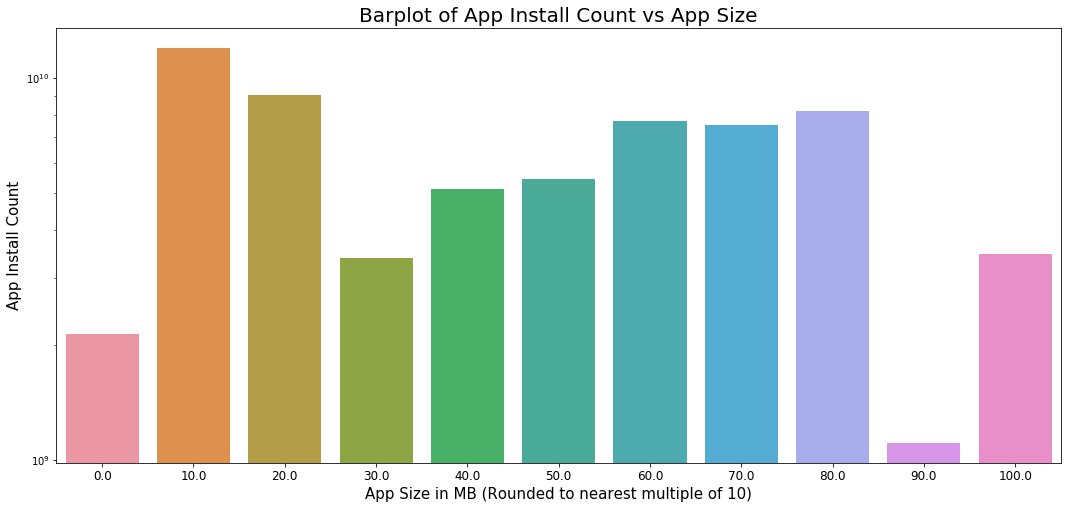

In [0]:
# App installs by Size

gps_data_copy = gps_data.copy()
gps_data_copy.Size = gps_data_copy.Size.round(-1)

app_size_installs_sum = gps_data_copy.groupby(["Size"]).sum()['Installs']
pd_df = pd.DataFrame(dict(features=app_size_installs_sum.index, count=app_size_installs_sum.values))
pd_df = pd_df.sort_values(by=['features'], ascending=True).reset_index(drop=True)

pd_df.head()

plt.subplots(figsize = (18,8))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("App Size in MB (Rounded to nearest multiple of 10)",fontsize=15)
ax.set_ylabel("App Install Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xticks(size=12)
plt.title('Barplot of App Install Count vs App Size', size = 20)
ax.set_yscale('log')
plt.savefig('App_Install_vs_App_Size.png')
plt.show()

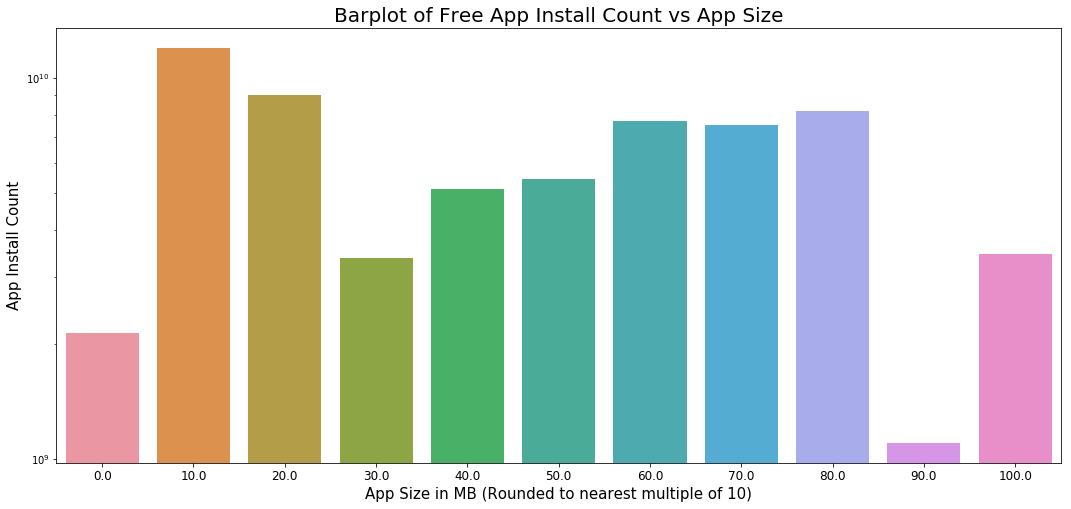

In [0]:
# App installs by Size

gps_data_copy = gps_data_free.copy()
gps_data_copy.Size = gps_data_copy.Size.round(-1)

app_size_installs_sum = gps_data_copy.groupby(["Size"]).sum()['Installs']
pd_df = pd.DataFrame(dict(features=app_size_installs_sum.index, count=app_size_installs_sum.values))
pd_df = pd_df.sort_values(by=['features'], ascending=True).reset_index(drop=True)

pd_df.head()

plt.subplots(figsize = (18,8))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("App Size in MB (Rounded to nearest multiple of 10)",fontsize=15)
ax.set_ylabel("App Install Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xticks(size=12)
plt.title('Barplot of Free App Install Count vs App Size', size = 20)
ax.set_yscale('log')
plt.savefig('Free_App_Install_vs_App_Size.png')
plt.show()

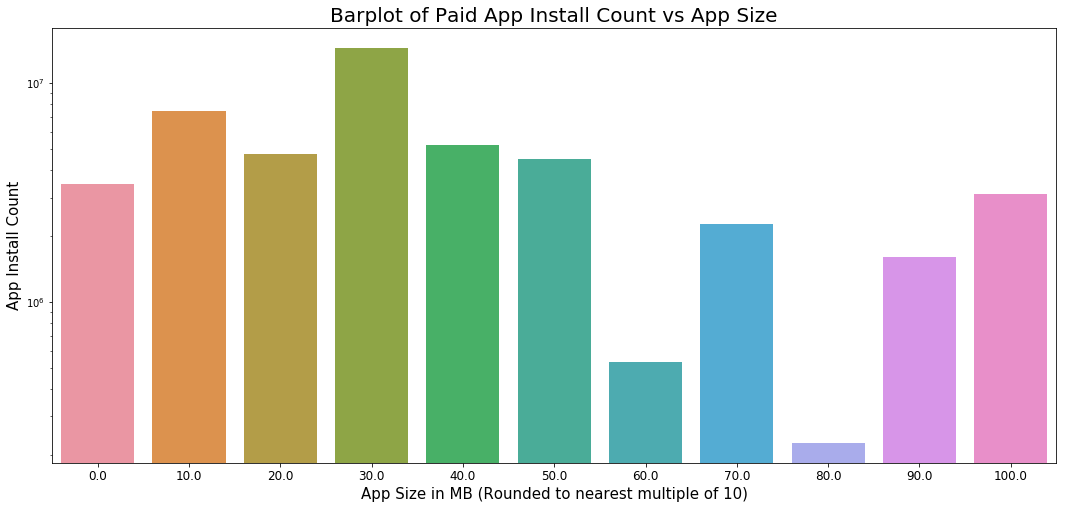

In [0]:
# App installs by Size

gps_data_copy = gps_data_paid.copy()
gps_data_copy.Size = gps_data_copy.Size.round(-1)

app_size_installs_sum = gps_data_copy.groupby(["Size"]).sum()['Installs']
pd_df = pd.DataFrame(dict(features=app_size_installs_sum.index, count=app_size_installs_sum.values))
pd_df = pd_df.sort_values(by=['features'], ascending=True).reset_index(drop=True)

pd_df.head()

plt.subplots(figsize = (18,8))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("App Size in MB (Rounded to nearest multiple of 10)",fontsize=15)
ax.set_ylabel("App Install Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xticks(size=12)
plt.title('Barplot of Paid App Install Count vs App Size', size = 20)
ax.set_yscale('log')
plt.savefig('Paid_App_Install_vs_App_Size.png')
plt.show()

###App Install By Size - Histogram

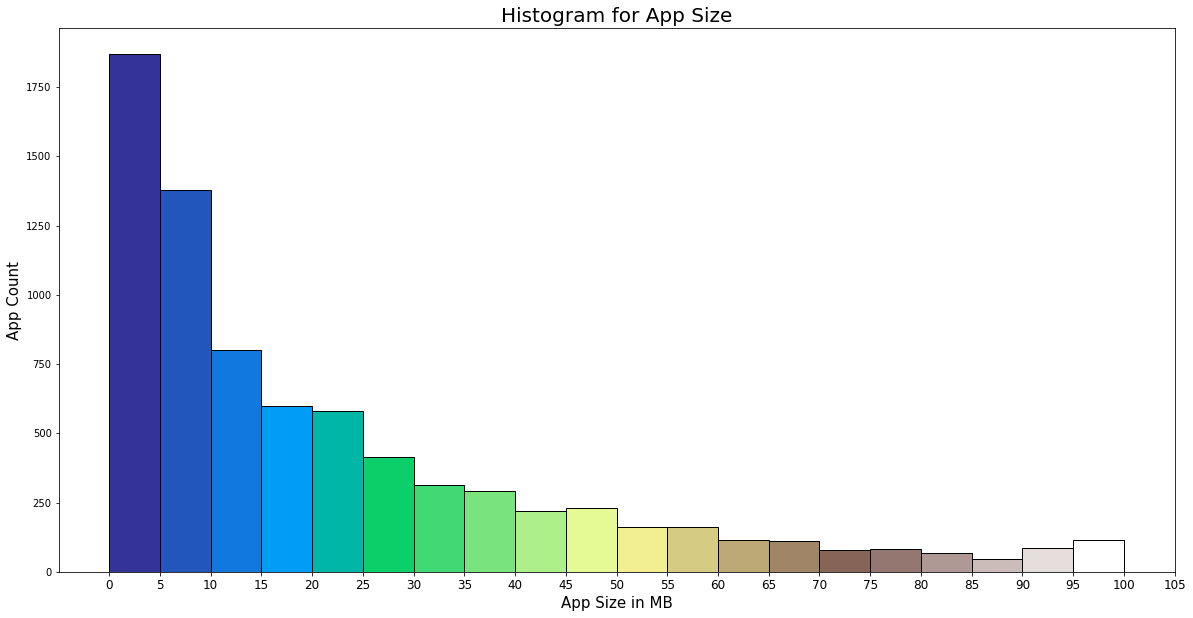

In [0]:
# Histogram App size

plt.figure(figsize=(20,10))    
nbins = 20
colors = plt.get_cmap('terrain')(np.linspace(0, 1, nbins))
n, bins, patches = plt.hist(gps_data.Size, bins=nbins, ec='black')

# apply the same color for each class to match the map
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.xticks(range(0,110,5),size=12)
plt.xlabel("App Size in MB",size=15)
plt.ylabel("App Count",size=15)

plt.title('Histogram for App Size', size = 20)
plt.savefig('Histogram_for_App_Size.png')
#ax.set_yscale('log')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



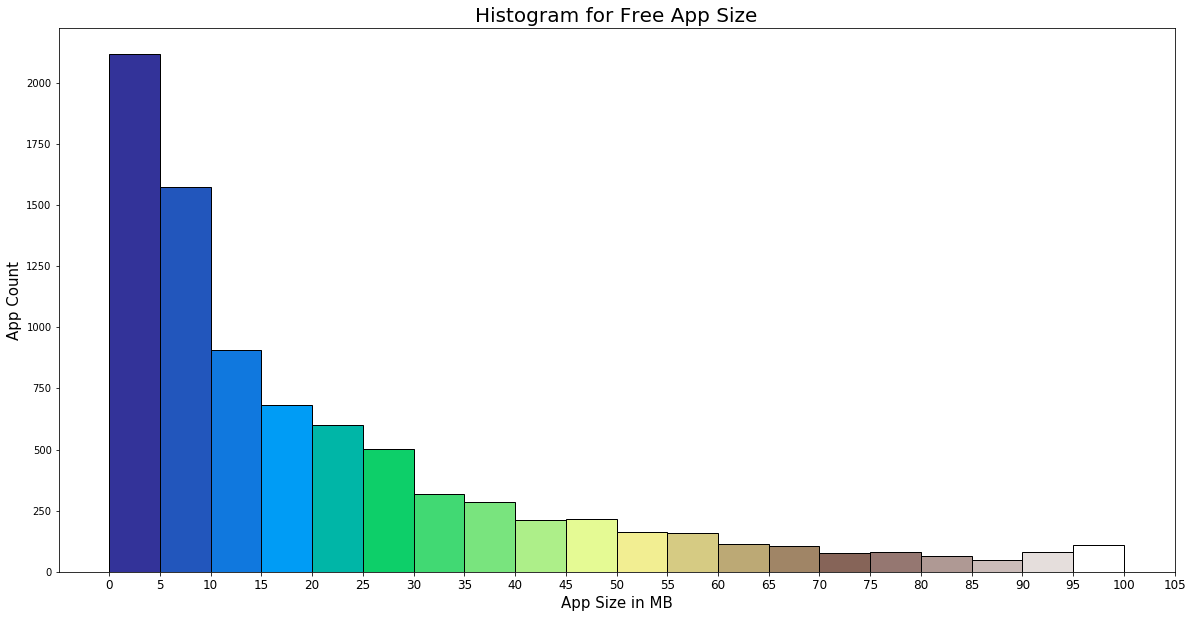

In [0]:
# Histogram App size

plt.figure(figsize=(20,10))    
nbins = 20
colors = plt.get_cmap('terrain')(np.linspace(0, 1, nbins))
n, bins, patches = plt.hist(gps_data_free.Size, bins=nbins, ec='black')

# apply the same color for each class to match the map
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.xticks(range(0,110,5),size=12)
plt.xlabel("App Size in MB",size=15)
plt.ylabel("App Count",size=15)

plt.title('Histogram for Free App Size', size = 20)
plt.savefig('Histogram_for_Free_App_Size.png')
#ax.set_yscale('log')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



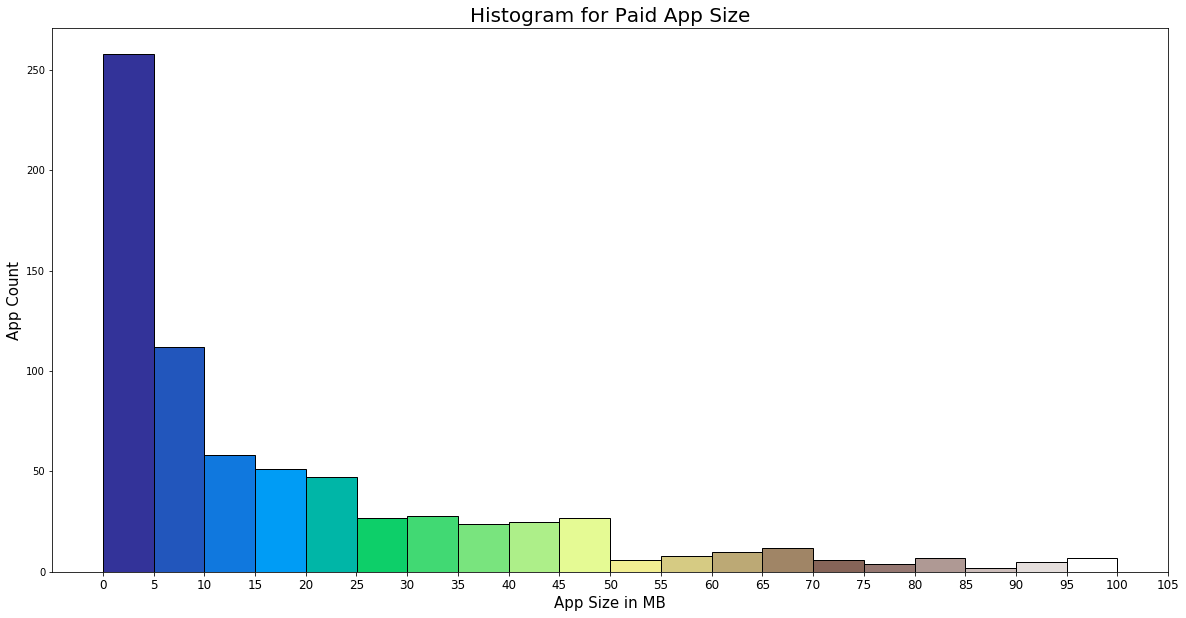

In [0]:
# Histogram App size

plt.figure(figsize=(20,10))    
nbins = 20
colors = plt.get_cmap('terrain')(np.linspace(0, 1, nbins))
n, bins, patches = plt.hist(gps_data_paid.Size, bins=nbins, ec='black')

# apply the same color for each class to match the map
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.xticks(range(0,110,5),size=12)
plt.xlabel("App Size in MB",size=15)
plt.ylabel("App Count",size=15)

plt.title('Histogram for Paid App Size', size = 20)
plt.savefig('Histogram_for_Paid_App_Size.png')
#ax.set_yscale('log')
plt.show()

###App Install by Genre

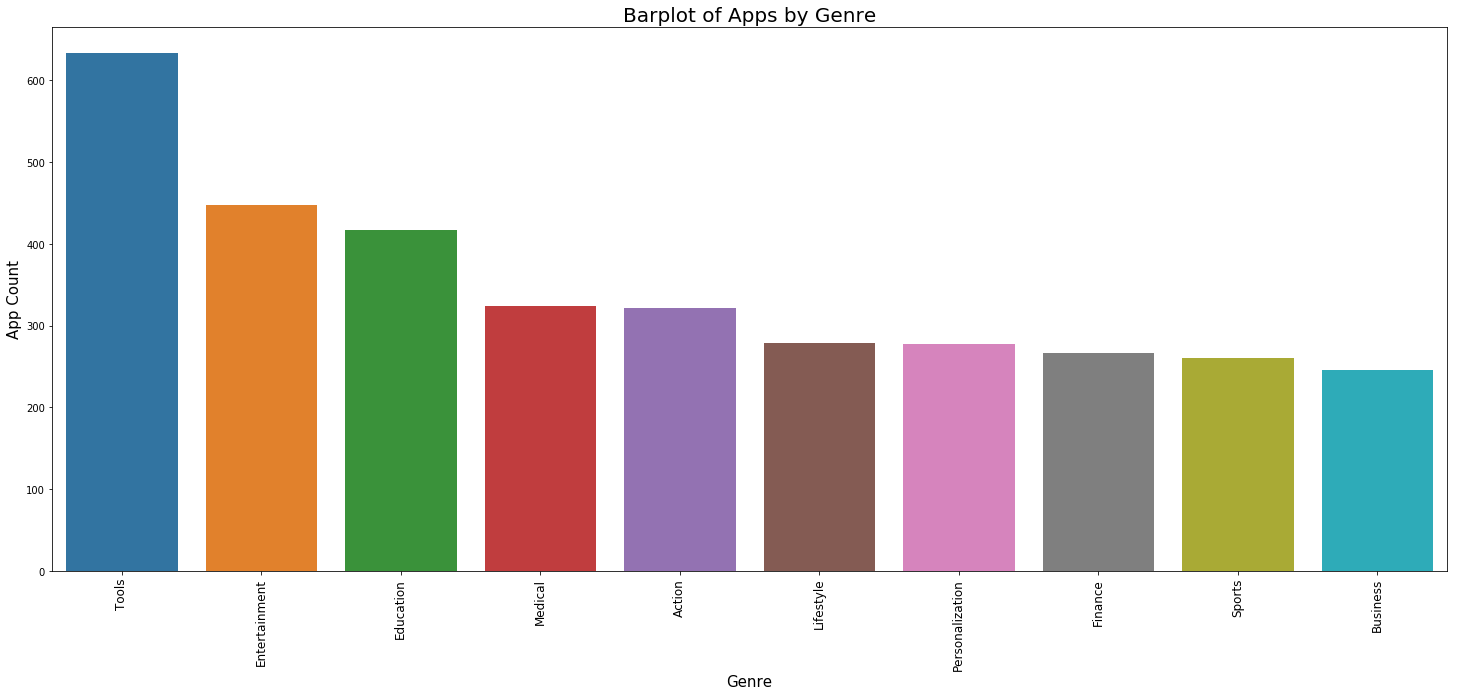

In [0]:
# Barplot for Apps count by genre - not much value add

app_count_by_genre = gps_data.groupby(["Genres"]).count()['App']
pd_df = pd.DataFrame(dict(features=app_count_by_genre.index, count=app_count_by_genre.values))
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

plt.subplots(figsize = (25,10))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("Genre",fontsize=15)
ax.set_ylabel("App Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)
plt.title('Barplot of Apps by Genre', size = 20)
plt.savefig('Barplot_of_Apps_by_Genre.png')
#ax.set_yscale('log')
plt.show()

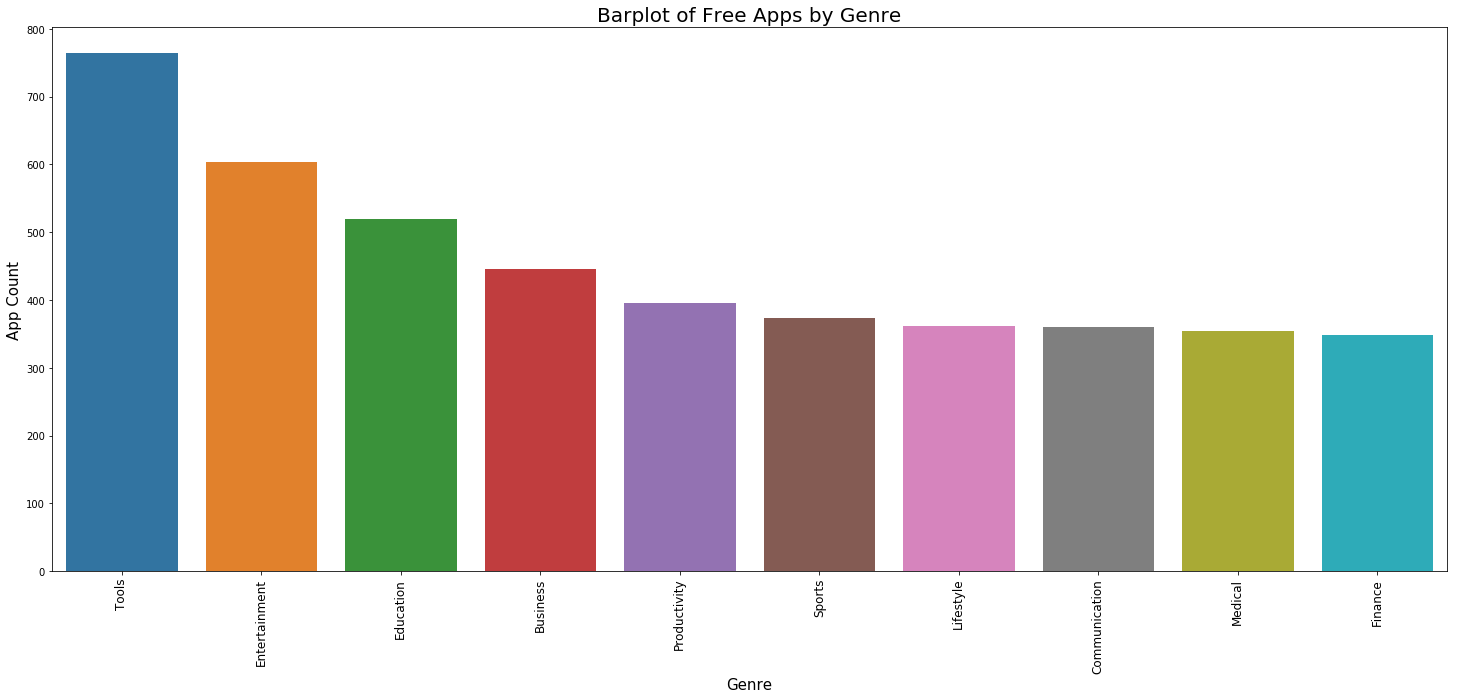

In [0]:
# Barplot for Apps count by genre - not much value add

app_count_by_genre = gps_data_free.groupby(["Genres"]).count()['App']
pd_df = pd.DataFrame(dict(features=app_count_by_genre.index, count=app_count_by_genre.values))
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

plt.subplots(figsize = (25,10))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("Genre",fontsize=15)
ax.set_ylabel("App Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)
plt.title('Barplot of Free Apps by Genre', size = 20)
#ax.set_yscale('log')
plt.savefig('Barplot_of_Free_Apps_by_Genre.png')
plt.show()

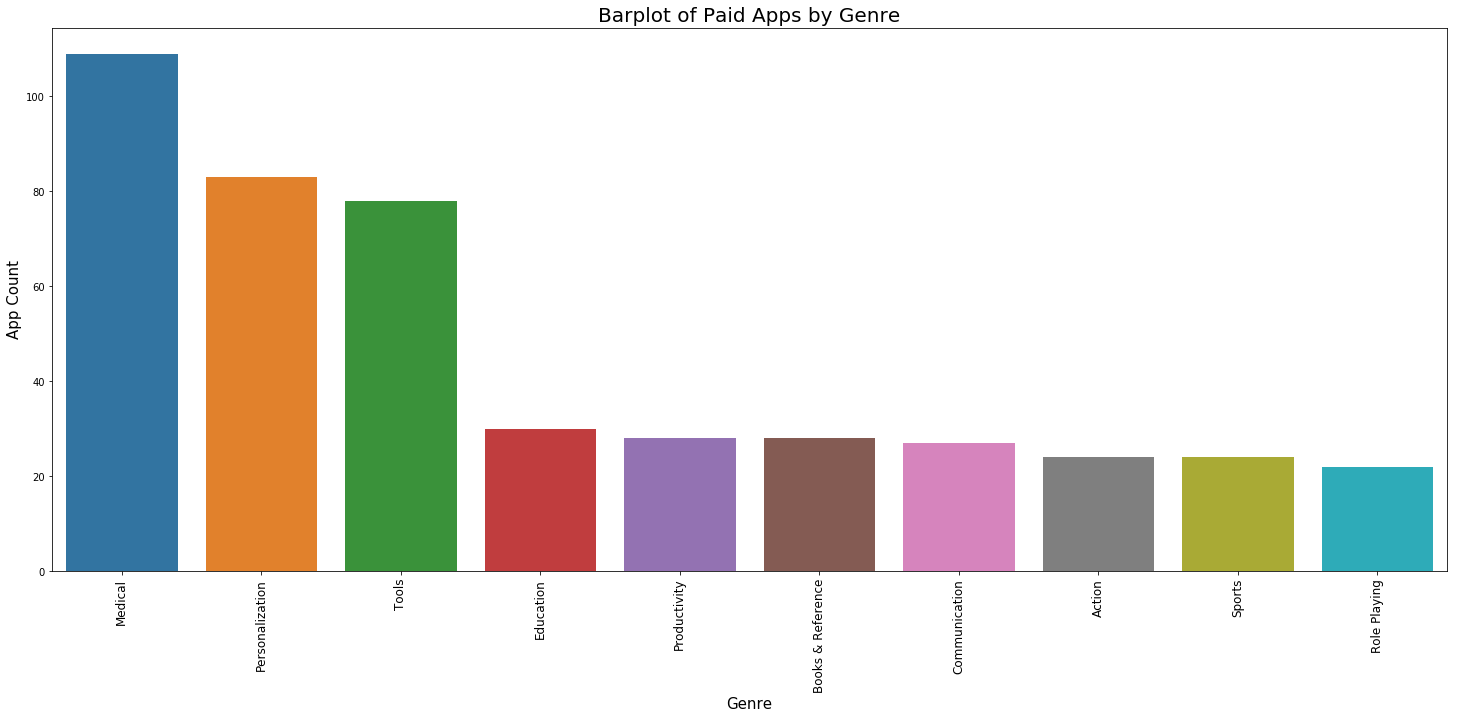

In [0]:
# Barplot for Apps count by genre - not much value add

app_count_by_genre = gps_data_paid.groupby(["Genres"]).count()['App']
pd_df = pd.DataFrame(dict(features=app_count_by_genre.index, count=app_count_by_genre.values))

#BScreen limited results to top 10 genres
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

plt.subplots(figsize = (25,10))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("Genre",fontsize=15)
ax.set_ylabel("App Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)
plt.title('Barplot of Paid Apps by Genre', size = 20)
#ax.set_yscale('log')
plt.savefig('Barplot_of_Paid_Apps_by_Genre.png')
plt.show()

###Sentiment by Category

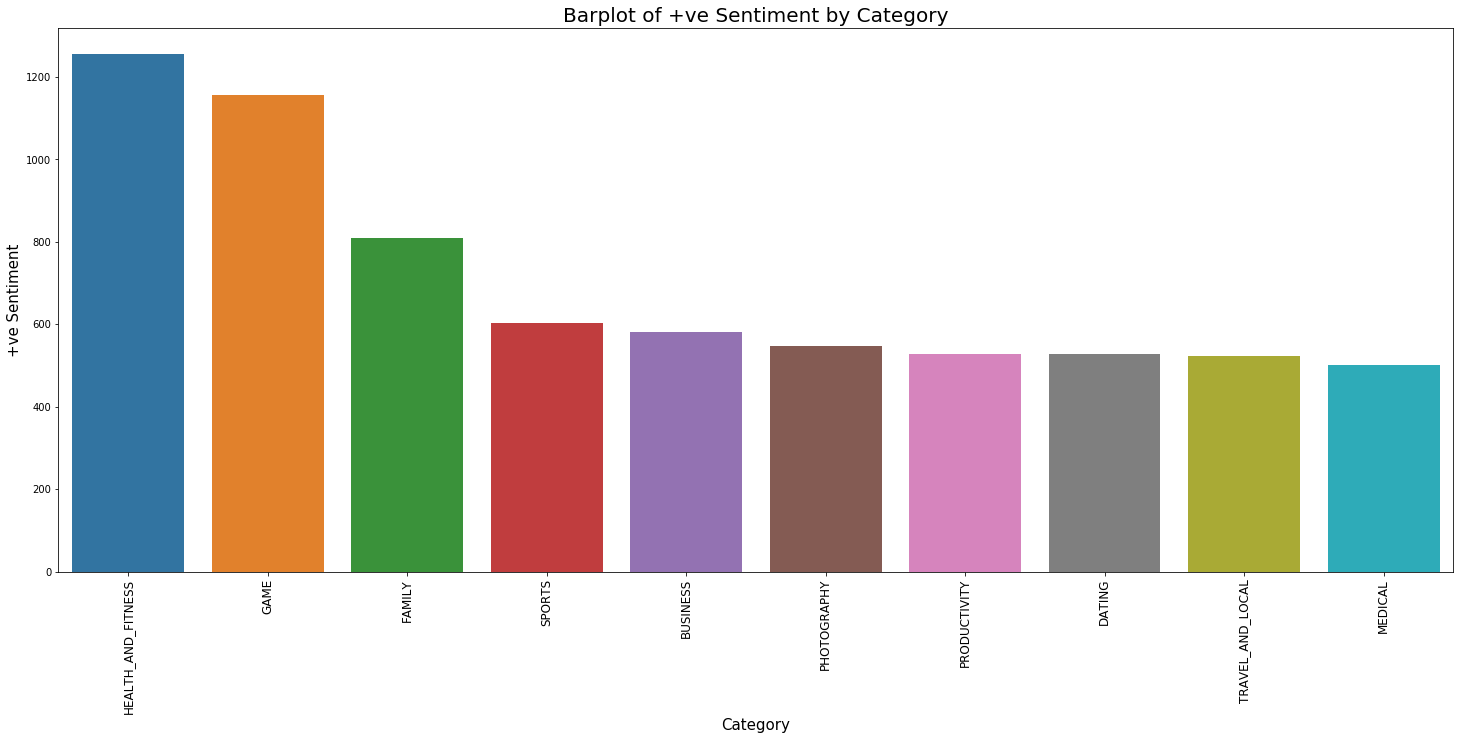

In [0]:
# Barplot for +ve Sentiment by Category

app_count_by_genre = gps_merged.groupby(["Category"]).sum()['Sentiment_Polarity']
pd_df = pd.DataFrame(dict(features=app_count_by_genre.index, count=app_count_by_genre.values))
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

plt.subplots(figsize = (25,10))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("Category",fontsize=15)
ax.set_ylabel("+ve Sentiment",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)
plt.title('Barplot of +ve Sentiment by Category', size = 20)
#ax.set_yscale('log')
plt.savefig('Sentiment_by_Category.png')
plt.show()

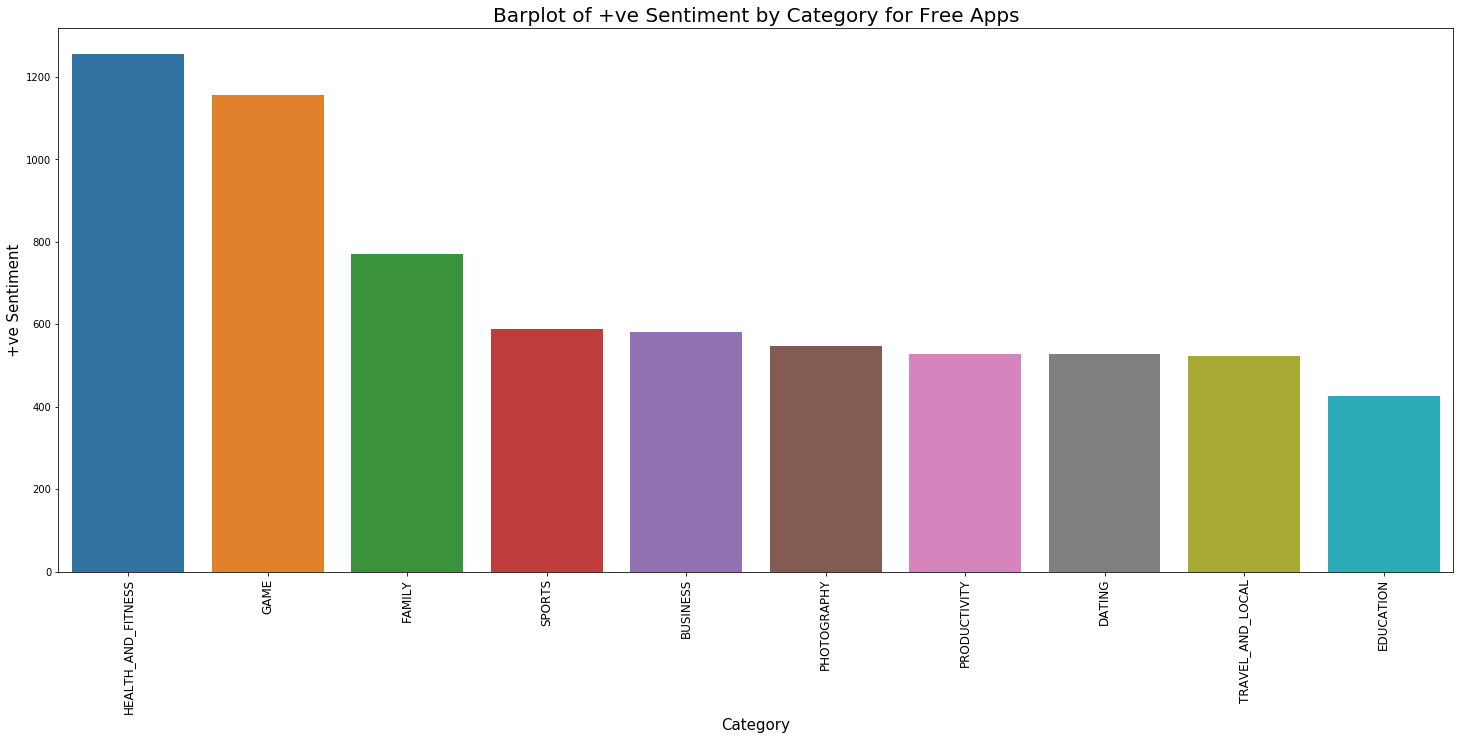

In [0]:
# Barplot for +ve Sentiment by Category

app_count_by_genre = gps_merged_free.groupby(["Category"]).sum()['Sentiment_Polarity']
pd_df = pd.DataFrame(dict(features=app_count_by_genre.index, count=app_count_by_genre.values))
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

plt.subplots(figsize = (25,10))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("Category",fontsize=15)
ax.set_ylabel("+ve Sentiment",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)
plt.title('Barplot of +ve Sentiment by Category for Free Apps', size = 20)
#ax.set_yscale('log')
plt.savefig('Sentiment_by_Category_for_Free_Apps.png')
plt.show()


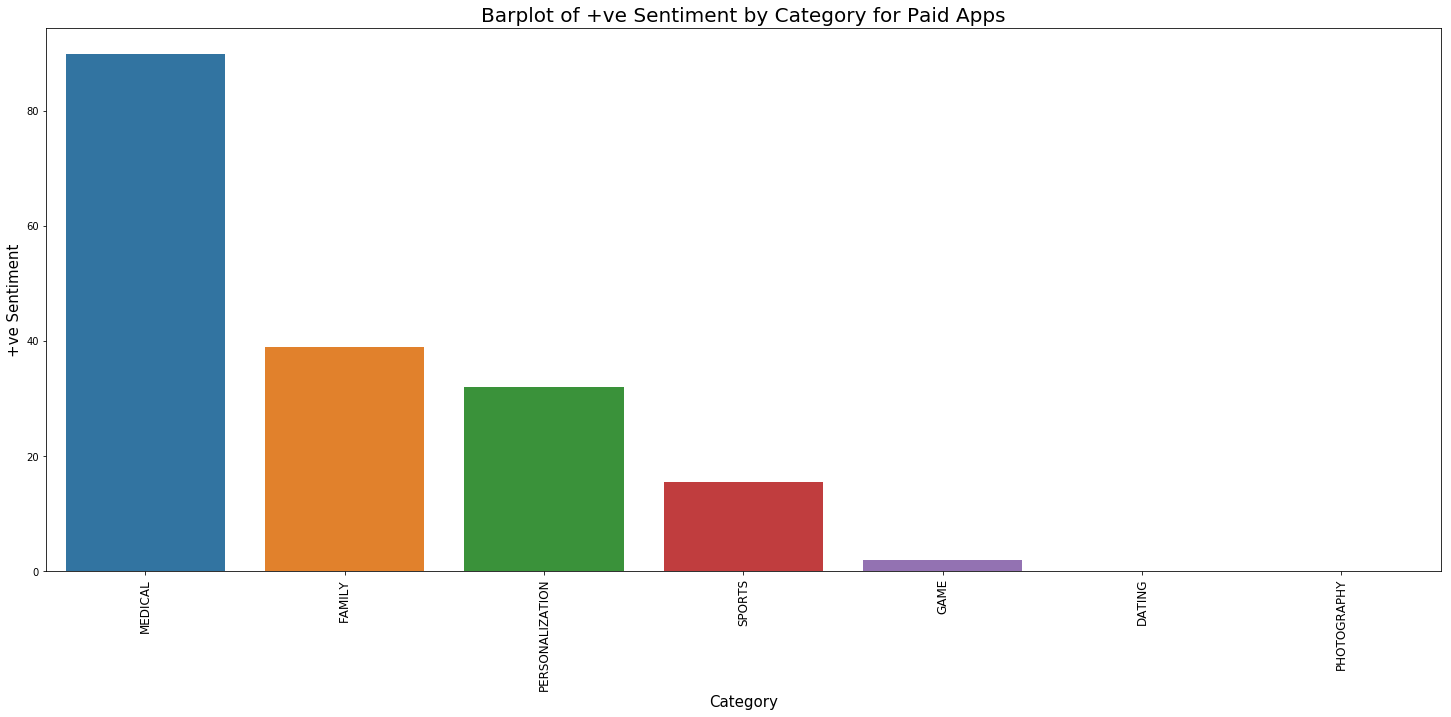

In [0]:
# Barplot for +ve Sentiment by Category

app_count_by_genre = gps_merged_paid.groupby(["Category"]).sum()['Sentiment_Polarity']
pd_df = pd.DataFrame(dict(features=app_count_by_genre.index, count=app_count_by_genre.values))
pd_df = pd_df.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)


plt.subplots(figsize = (25,10))
plt.xticks(rotation = 90)
ax=sns.barplot('features','count', data = pd_df)
ax.set_xlabel("Category",fontsize=15)
ax.set_ylabel("+ve Sentiment",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(size=12)
plt.title('Barplot of +ve Sentiment by Category for Paid Apps', size = 20)
#ax.set_yscale('log')
plt.savefig('Sentiment_by_Category_for_Paid_Apps.png')
plt.show()


* End of Notebook